In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# load data

mental_2014 = pd.read_csv('data/mental_2014.csv')
mental_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Data Cleaning

In [3]:
# Dropping unneeded columns

mental_2014 = mental_2014.drop(labels=['Timestamp', 'Country', 'state', 'self_employed', 'obs_consequence', 'comments', 'phys_health_consequence', 'phys_health_interview', 'work_interfere', 'mental_health_interview'], axis=1)
mental_2014.shape

(1259, 17)

In [4]:
mental_2014.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,Female,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
1,44,M,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,Don't know
2,32,Male,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Male,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
4,31,Male,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Don't know


In [5]:
mental_2016 = pd.read_csv('data/mental_2016.csv')
mental_2016.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,39,Male,No,0,26-100,Sometimes,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,Maybe,Yes,I don't know
1,29,male,Yes,1,6-25,Never,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,Maybe,Yes,Yes
2,38,Male,No,1,6-25,Always,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Maybe,I don't know
3,43,male,No,1,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43,Female,Yes,1,6-25,Sometimes,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,No,No


In [6]:
mental_2016.shape

(1433, 17)

In [7]:
mental_2019 = pd.read_csv('data/mental_2019.csv')
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?"
0,25,No,False,26-100,True,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,5.0,5.0
1,51,Yes,False,26-100,True,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,5.0,7.0
2,27,I don't know,False,26-100,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,5.0,4.0
3,37,Yes,False,100-500,True,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,1.0,3.0
4,46,No,False,26-100,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,4.0,4.0


In [8]:
mental_2019['treatment'] = mental_2019['treatment'].astype(int)
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?"
0,25,No,0,26-100,True,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,5.0,5.0
1,51,Yes,0,26-100,True,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,5.0,7.0
2,27,I don't know,0,26-100,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,5.0,4.0
3,37,Yes,0,100-500,True,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,1.0,3.0
4,46,No,0,26-100,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,4.0,4.0


In [9]:
# deal with null values

mental_2019['tech_company'].fillna(value=False, inplace=True)
mental_2019['tech_company'] = mental_2019['tech_company'].astype(int)
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?"
0,25,No,0,26-100,1,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,5.0,5.0
1,51,Yes,0,26-100,1,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,5.0,7.0
2,27,I don't know,0,26-100,1,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,5.0,4.0
3,37,Yes,0,100-500,1,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,1.0,3.0
4,46,No,0,26-100,1,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,4.0,4.0


In [10]:
# rename and drop columns

mental_2019['mental_vs_physical'] = mental_2019['Overall, how much importance does your employer place on physical health?'] < mental_2019['Overall, how much importance does your employer place on mental health?']
mental_2019.drop(columns=['Overall, how much importance does your employer place on physical health?', 'Overall, how much importance does your employer place on mental health?'], inplace=True)
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,25,No,0,26-100,1,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,False
1,51,Yes,0,26-100,1,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,True
2,27,I don't know,0,26-100,1,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,False
3,37,Yes,0,100-500,1,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,True
4,46,No,0,26-100,1,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,False


In [11]:
mental_2019['mental_vs_physical'] = mental_2019['mental_vs_physical'].replace({True:'Yes', False:'No'})
mental_2019.head()

,Age,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,25,No,0,26-100,1,I don't know,No,Yes,Yes,I don't know,Very easy,No,Yes,Yes,No
1,51,Yes,0,26-100,1,Yes,No,No,Yes,Yes,I don't know,No,Maybe,Maybe,Yes
2,27,I don't know,0,26-100,1,I don't know,No,No,I don't know,I don't know,Somewhat difficult,No,Maybe,No,No
3,37,Yes,0,100-500,1,I don't know,No,Yes,Yes,Yes,Very easy,No,Maybe,Yes,Yes
4,46,No,0,26-100,1,I don't know,No,I don't know,I don't know,I don't know,I don't know,NaN,No,No,No


In [12]:
mental_2016['supervisor'].unique()

array(['Yes', 'Maybe', nan, 'No'], dtype=object)

In [13]:
mental_2019['supervisor'].unique()

array(['Yes', 'Maybe', 'No', nan], dtype=object)

In [14]:
# Combining the two datasets

combined = pd.concat([mental_2014, mental_2016, mental_2019], axis=0)
combined.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,Female,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
1,44,M,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,Don't know
2,32,Male,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Male,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
4,31,Male,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Don't know


In [15]:
combined['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No', "I don't know", nan], dtype=object)

In [16]:
combined[combined['mental_vs_physical']=="I don't know"].shape

(493, 17)

In [17]:
# fill maybes to keep data

combined['mental_vs_physical'] = combined['mental_vs_physical'].str.replace("I don't know", 'Yes')
combined['mental_vs_physical'] = combined['mental_vs_physical'].str.replace("Don't know", 'No')

combined['mental_vs_physical'].fillna(value='No', inplace=True)
combined['mental_vs_physical'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
combined.shape

(3044, 17)

In [19]:
combined.head()

,Age,Gender,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical
0,37,Female,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes
1,44,M,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No
2,32,Male,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,No
3,31,Male,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No
4,31,Male,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,No


In [20]:
# Fixing null values in 'care_options'

combined['care_options'] = combined['care_options'].str.replace('I am not sure', 'Not sure')
combined['care_options'].unique()

array(['Not sure', 'No', 'Yes', nan], dtype=object)

In [21]:
combined['care_options'].fillna(value='Not sure', inplace=True)
combined['care_options'].isna().sum()

0

In [22]:
# drop unneccesary columns

combined.drop(columns=['Gender', 'remote_work'], inplace=True)
combined.rename(columns={'Age':'age'}, inplace=True)

In [23]:
combined.shape

(3044, 15)

In [24]:
combined.dropna(how='any').shape

(2650, 15)

In [40]:
# check to see if there are ages we should drop
print(max(combined['age']))
print(min(combined['age']))

99999999999
-1726


In [41]:
len(combined[combined['age']<16]['age'])

9

In [42]:
len(combined[combined['age']>100]['age'])

3

In [45]:
# remove rows with bad ages (above 100 or under 16)

combined = combined.loc[(combined.age > 16) & (combined.age < 100)]
combined.shape

(3032, 15)

In [52]:
print(max(combined['age']))
print(min(combined['age']))

99
17


In [54]:
# make age categorical

combined['under 30'] = [1 if i < 30 else 0 for i in combined['age']]
combined['30-50'] = [1 if i >= 30 and i < 50 else 0 for i in combined['age']]
combined['over 50'] = [1 if i >= 50 else 0 for i in combined['age']]
combined.drop(columns=['age', ''], inplace=True)

In [99]:
combined['treatment']

0      Yes
1       No
2       No
3      Yes
4       No
      ... 
347      0
348      0
349      0
350      0
351      1
Name: treatment, Length: 3032, dtype: object

In [113]:
combined['tech_company']

0      Yes
1       No
2      Yes
3      Yes
4      Yes
      ... 
347      0
348      0
349      0
350      1
351      1
Name: tech_company, Length: 3032, dtype: object

In [139]:
# function to make all of a column yes or no

def replace_yes_no(response):
    if (response == 1):
        return 'Yes'
    elif (response == 0):
        return 'No'
    else:
        return response

In [140]:
combined['treatment'] = combined['treatment'].apply(replace_yes_no)
combined['tech_company'] = combined['tech_company'].apply(replace_yes_no)

In [141]:
combined['treatment'] 

0      Yes
1       No
2       No
3      Yes
4       No
      ... 
347     No
348     No
349     No
350     No
351    Yes
Name: treatment, Length: 3032, dtype: object

In [142]:
combined['tech_company']

0      Yes
1       No
2      Yes
3      Yes
4      Yes
      ... 
347     No
348     No
349     No
350    Yes
351    Yes
Name: tech_company, Length: 3032, dtype: object

In [179]:
# function to replace Don't know with I don't know 
def maybes(response):
    if response == "Not eligible for coverage / N/A":
        return "Not eligible for coverage / NA"
    else:
        return response

In [180]:
combined['benefits'] = combined['benefits'].apply(maybes)
combined['wellness_program'] = combined['wellness_program'].apply(maybes)
combined['seek_help'] = combined['seek_help'].apply(maybes)
combined['anonymity'] = combined['anonymity'].apply(maybes)
combined['leave'] = combined['leave'].apply(maybes)

In [181]:
# function to replace N/A with NA
def NA(response):
    if response == "N/A":
        return "NA"
    else:
        return response
    
combined['benefits'] = combined['benefits'].apply(NA)

In [182]:
# cleaned dataset

combined.head()

,family_history,treatment,no_employees,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_vs_physical,under 30,30-50,over 50
0,No,Yes,6-25,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,Yes,0,1,0
1,No,No,More than 1000,No,I don't know,No,I don't know,I don't know,I don't know,I don't know,Maybe,No,No,No,0,1,0
2,No,No,6-25,Yes,No,No,No,No,I don't know,Somewhat difficult,No,Yes,Yes,No,0,1,0
3,Yes,Yes,26-100,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,No,0,1,0
4,No,No,100-500,Yes,Yes,No,I don't know,I don't know,I don't know,I don't know,No,Some of them,Yes,No,0,1,0


## Model Building

In [183]:
from sklearn.model_selection import train_test_split

# split into train and test sets and dummy encode

X = pd.get_dummies(combined.drop(['mental_vs_physical'], axis=1))
y = [1 if i == 'Yes' else 0 for i in combined['mental_vs_physical']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=88)

train = X_train.copy()
train['mental_vs_physical'] = y_train

test = X_test.copy()
test['mental-vs_physical'] = y_test

X_train.shape, X_test.shape 

((2425, 50), (607, 50))

In [184]:
X_train.columns

Index(['under 30', '30-50', 'over 50', 'family_history_I don't know',
       'family_history_No', 'family_history_Yes', 'treatment_No',
       'treatment_Yes', 'no_employees_1-5', 'no_employees_100-500',
       'no_employees_26-100', 'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'tech_company_No', 'tech_company_Yes',
       'benefits_I don't know', 'benefits_No',
       'benefits_Not eligible for coverage / NA', 'benefits_Yes',
       'care_options_No', 'care_options_Not sure', 'care_options_Yes',
       'wellness_program_I don't know', 'wellness_program_No',
       'wellness_program_Yes', 'seek_help_I don't know', 'seek_help_No',
       'seek_help_Yes', 'anonymity_I don't know', 'anonymity_No',
       'anonymity_Yes', 'leave_Difficult', 'leave_I don't know',
       'leave_Neither easy nor difficult', 'leave_Somewhat difficult',
       'leave_Somewhat easy', 'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_Maybe', 'menta

In [185]:
# performance metric functions

def TPR(y_test, y_pred):
    """Function that takes in actual y value from test set and predictions from a model and returns the TPR"""
    cm = confusion_matrix(y_test, y_pred)
    return cm.ravel()[3]/ (cm.ravel()[3] + cm.ravel()[2])


def FPR(y_test, y_pred):
    """Function that takes in actual y value from test set and predictions from a model and returns the FPR"""
    cm = confusion_matrix(y_test, y_pred)
    return cm.ravel()[1]/ (cm.ravel()[1] + cm.ravel()[0])

### Baseline

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [187]:
print('1:',np.count_nonzero(y_train))
print('0:',len(y_train) - np.count_nonzero(y_train))

1: 969
0: 1456


In [188]:
# Baseline always predicts 0, since 0 is most common classification in train set

y_pred_baseline = np.zeros(len(y_test))

print('Baseline ACC:', accuracy_score(y_test, y_pred_baseline))
print('Baseline TPR:', TPR(y_test, y_pred_baseline))
print('Baseline FPR:', FPR(y_test, y_pred_baseline))

Baseline ACC: 0.5996705107084019
Baseline TPR: 0.0
Baseline FPR: 0.0


### Logistic Regression

In [189]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF function 

def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

In [190]:
VIF(X_train, X_train.columns)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


under 30                                         inf
30-50                                            inf
over 50                                          inf
family_history_I don't know                      inf
family_history_No                                inf
family_history_Yes                               inf
treatment_No                                     inf
treatment_Yes                                    inf
no_employees_1-5                                 inf
no_employees_100-500                             inf
no_employees_26-100                              inf
no_employees_500-1000                            inf
no_employees_6-25                                inf
no_employees_More than 1000                      inf
tech_company_No                            15.797870
tech_company_Yes                           21.715089
benefits_I don't know                            inf
benefits_No                                      inf
benefits_Not eligible for coverage / NA       

In [223]:
# remove columns with VIF over 10 to reduce multicolinearity
VIF(X_train, X_train.drop(columns=['under 30', "family_history_I don't know", 
        'no_employees_1-5', 'treatment_No', "benefits_I don't know", 'care_options_Not sure',
        "wellness_program_I don't know", "seek_help_I don't know", "anonymity_I don't know",
        "leave_I don't know", "coworkers_Maybe",'tech_company_Yes', 'supervisor_Yes']).columns)

30-50                                      1.127479
over 50                                    1.137968
family_history_No                          3.088689
family_history_Yes                         2.853798
treatment_Yes                              1.282545
no_employees_100-500                       2.484708
no_employees_26-100                        2.760089
no_employees_500-1000                      1.615334
no_employees_6-25                          2.523926
no_employees_More than 1000                3.045408
tech_company_No                            1.146778
benefits_No                                1.806180
benefits_Not eligible for coverage / NA    1.161156
benefits_Yes                               2.298463
care_options_No                            1.608065
care_options_Yes                           2.097915
wellness_program_No                        3.116198
wellness_program_Yes                       2.685740
seek_help_No                               2.108942
seek_help_Ye

In [224]:
from sklearn.model_selection import GridSearchCV

# grid search for C first try
grid_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'random_state': [88]}


logreg = LogisticRegression(random_state=88)
X_train_new =  X_train.drop(columns=['under 30', "family_history_I don't know", 
        'no_employees_1-5', 'treatment_No', "benefits_I don't know", 'care_options_Not sure',
        "wellness_program_I don't know", "seek_help_I don't know", "anonymity_I don't know",
        "leave_I don't know", "coworkers_Maybe",'tech_company_Yes', 'supervisor_Yes'])
logreg_cv = GridSearchCV(logreg, param_grid=grid_values, cv=5).fit(X_train_new, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

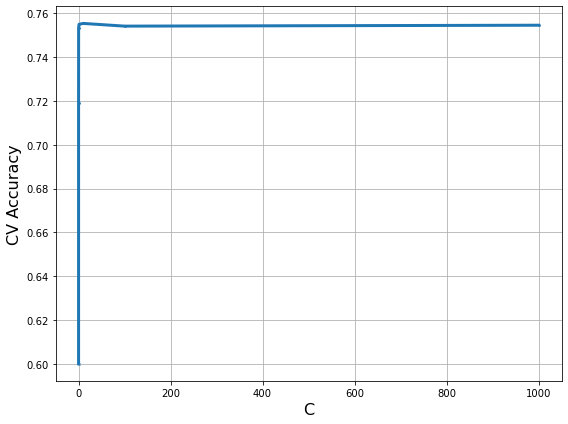

Best ccp_alpha {'C': 10, 'random_state': 88}


In [217]:
# plot C values from grid search first try

ccp_alpha = logreg_cv.cv_results_['param_C'].data
ACC_scores = logreg_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('C', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', logreg_cv.best_params_)

In [218]:
# grid search for C second try
grid_values = {'C': np.linspace(0.001, 11, 51),
              'random_state': [88]}


logreg = LogisticRegression(random_state=88)
logreg_cv = GridSearchCV(logreg, param_grid=grid_values, cv=5).fit(X_train_new, y_train)

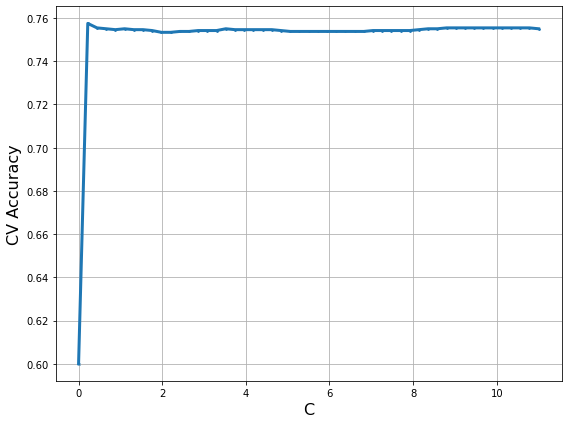

Best ccp_alpha {'C': 0.22098, 'random_state': 88}


In [219]:
# plot C values from grid search second try

ccp_alpha = logreg_cv.cv_results_['param_C'].data
ACC_scores = logreg_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('C', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', logreg_cv.best_params_)

In [220]:
X_test_new =  X_test.drop(columns=['under 30', "family_history_I don't know", 
        'no_employees_1-5', 'treatment_No', "benefits_I don't know", 'care_options_Not sure',
        "wellness_program_I don't know", "seek_help_I don't know", "anonymity_I don't know",
        "leave_I don't know", "coworkers_Maybe",'tech_company_Yes', 'supervisor_Yes'])
y_prob = logreg_cv.predict_proba(X_test_new)
y_pred_logreg = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]])

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print ("Confusion Matrix: \n", cm_logreg)
print ("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print ("TPR:", TPR(y_test, y_pred_logreg))
print ("FPR:", FPR(y_test, y_pred_logreg))

Confusion Matrix: 
 [[288  76]
 [ 84 159]]
Accuracy: 0.7364085667215815
TPR: 0.654320987654321
FPR: 0.2087912087912088


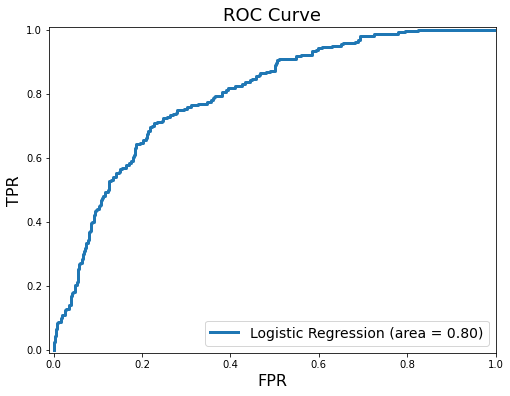

In [221]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresh = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [222]:
# decide to keep 0.5 as threshold
roc = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresh': thresh}).sort_values('Thresh')
roc = roc[roc['Thresh'] < 1]
roc.loc[(roc.TPR > 0.73) & (roc.FPR < 0.3)].sort_values('TPR').head(10)

,FPR,TPR,Thresh
133,0.269231,0.732510,0.429718
132,0.263736,0.732510,0.432310
135,0.277473,0.736626,0.422269
134,0.269231,0.736626,0.428504
137,0.280220,0.740741,0.419556
136,0.277473,0.740741,0.420448
139,0.293956,0.748971,0.404108
138,0.280220,0.748971,0.415381
140,0.293956,0.753086,0.402282


### Decision Tree

In [225]:
from sklearn.tree import DecisionTreeClassifier

# first try grid search for best ccp_alpha

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 51)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

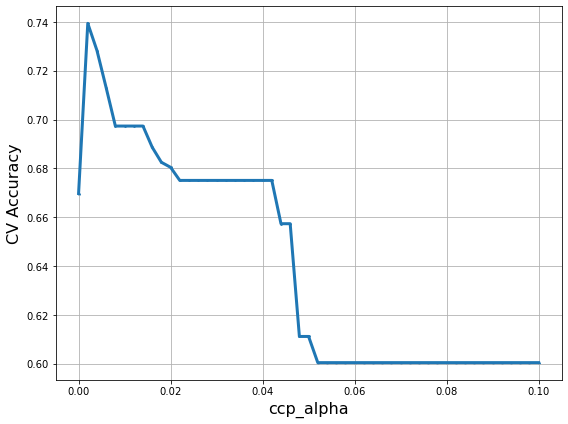

Best ccp_alpha {'ccp_alpha': 0.002}


In [226]:
# plot ccp_alpha values from grid search first try

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [227]:
# second try grid search for best ccp_alpha with smaller range

grid_values = {'ccp_alpha': np.linspace(0, 0.01, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

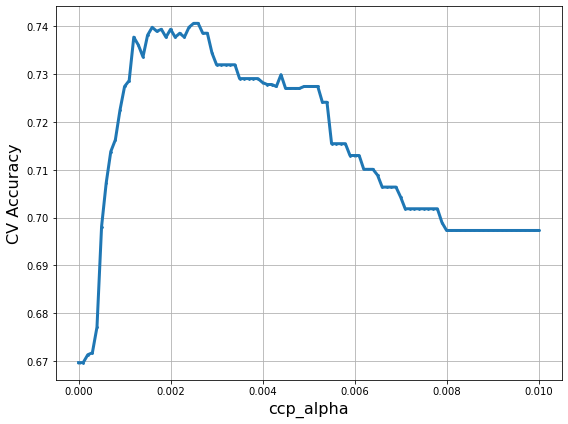

Best ccp_alpha {'ccp_alpha': 0.0025}


In [228]:
# plot ccp_alpha values from grid search second try

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [229]:
# predictions for dtc model

y_pred_dtc = dtc_cv.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)

print ("Confusion Matrix: \n", cm_dtc)
print ("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print ("TPR:", TPR(y_test, y_pred_dtc))
print ("FPR:", FPR(y_test, y_pred_dtc))

Confusion Matrix: 
 [[267  97]
 [ 76 167]]
Accuracy: 0.71499176276771
TPR: 0.6872427983539094
FPR: 0.2664835164835165


### Vanilla Bagging

In [230]:
from sklearn.ensemble import RandomForestClassifier

# random forest model with max_features set to the total number of features 

bagging = RandomForestClassifier(max_features=len(X_train.columns), random_state=1)
bagging.fit(X_train, y_train)

RandomForestClassifier(max_features=50, random_state=1)

In [231]:
# preditions for bagging 

y_pred_bagging = bagging.predict(X_test)
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

print ("Confusion Matrix: \n", cm_bagging)
print ("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print ("TPR:", TPR(y_test, y_pred_bagging))
print ("FPR:", FPR(y_test, y_pred_bagging))

Confusion Matrix: 
 [[273  91]
 [ 89 154]]
Accuracy: 0.7034596375617792
TPR: 0.6337448559670782
FPR: 0.25


### Random Forest

In [232]:
# grid search for max_features

grid_values = {'max_features': np.linspace(1,8,8, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, cv=5, verbose=1)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   52.7s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             verbose=1)

In [233]:
# predictions for rf model

y_pred_rf = rf_cv.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print ("Confusion Matrix: \n", cm_rf)
print ("Accuracy:", accuracy_score(y_test, y_pred_rf))
print ("TPR:", TPR(y_test, y_pred_rf))
print ("FPR:", FPR(y_test, y_pred_rf))

Confusion Matrix: 
 [[289  75]
 [ 84 159]]
Accuracy: 0.7380560131795717
TPR: 0.654320987654321
FPR: 0.20604395604395603


### Linear SVM

In [234]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# grid search for C

grid_values = {'C': np.logspace(-2,2,10),
               'penalty': ['l2'],
               'loss': ['hinge']} 

tic = time.time()

svm = LinearSVC() 
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train, y_train)
svm_cv = GridSearchCV(svm, param_grid=grid_values, cv=5, verbose=1)
svm_cv.fit(scaled_x, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: Co

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


time: 6.69 s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.7s finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [235]:
# predictions for linear SVM model

y_pred_svm = svm_cv.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_svm)
print ("Confusion Matrix: \n", cm_rf)
print ("Accuracy:", accuracy_score(y_test, y_pred_svm))
print ("TPR:", TPR(y_test, y_pred_svm))
print ("FPR:", FPR(y_test, y_pred_svm))

Confusion Matrix: 
 [[ 98 266]
 [  3 240]]
Accuracy: 0.556836902800659
TPR: 0.9876543209876543
FPR: 0.7307692307692307


### RBF SVM

In [236]:
# grid search for C, gamma

grid_values = {'C': np.logspace(-2,2,10),
               'gamma': np.logspace(-9, 3, 13),
                'kernel': ['rbf']} 

tic = time.time()

svm_rbf = SVC() 
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train, y_train)
svm_cv_rbf = GridSearchCV(svm_rbf, param_grid=grid_values, cv=5, verbose=1)
svm_cv_rbf.fit(scaled_x, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed:  3.5min finished


time: 208.02 s


In [237]:
# predictions for RBF SVM model

y_pred_svm_rbf = svm_cv_rbf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_svm_rbf)
print ("Confusion Matrix: \n", cm_rf)
print ("Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))
print ("TPR:", TPR(y_test, y_pred_svm_rbf))
print ("FPR:", FPR(y_test, y_pred_svm_rbf))

Confusion Matrix: 
 [[ 98 266]
 [  2 241]]
Accuracy: 0.5584843492586491
TPR: 0.9917695473251029
FPR: 0.7307692307692307


## Evaluate Models

In [238]:
# table to evaluate performance of models

comparison_data = {'Baseline': [accuracy_score(y_test, y_pred_baseline), 
                                           TPR(y_test, y_pred_baseline), FPR(y_test, y_pred_baseline)],
                    'Logistic Regression': [accuracy_score(y_test, y_pred_logreg), 
                                           TPR(y_test, y_pred_logreg), FPR(y_test, y_pred_logreg)],
                   'Decision Tree': [accuracy_score(y_test, y_pred_dtc), TPR(y_test, y_pred_dtc), 
                                     FPR(y_test, y_pred_dtc)], 
                   'Vanilla Bagging': [accuracy_score(y_test, y_pred_bagging), TPR(y_test, y_pred_bagging), 
                                     FPR(y_test, y_pred_bagging)], 
                   'Random Forest': [accuracy_score(y_test, y_pred_rf), TPR(y_test, y_pred_rf), FPR(y_test, y_pred_rf)],
                   'Linear SVM': [accuracy_score(y_test, y_pred_svm), TPR(y_test, y_pred_svm), FPR(y_test, y_pred_svm)],
                    'RBF SVM': [accuracy_score(y_test, y_pred_svm_rbf), TPR(y_test, y_pred_svm_rbf), 
                                FPR(y_test, y_pred_svm_rbf)]}

performance_df = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR'])
performance_df

,Baseline,Logistic Regression,Decision Tree,Vanilla Bagging,Random Forest,Linear SVM,RBF SVM
Accuracy,0.599671,0.736409,0.714992,0.703460,0.738056,0.556837,0.558484
TPR,0.000000,0.654321,0.687243,0.633745,0.654321,0.987654,0.991770
FPR,0.000000,0.208791,0.266484,0.250000,0.206044,0.730769,0.730769


## Final Model: Random Forest

In [243]:
# importance score for random forest

pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1).sort_values(
                    'Importance score', ascending=False)

,Feature,Importance score
40,mental_health_consequence_No,8.7
49,supervisor_Yes,6.0
46,supervisor_Maybe,5.1
38,leave_Very easy,5.1
42,coworkers_Maybe,4.2
44,coworkers_Some of them,4.0
31,anonymity_Yes,3.9
39,mental_health_consequence_Maybe,3.7
15,tech_company_Yes,3.6
33,leave_I don't know,3.5


In [244]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(max_features=rf_cv.best_params_['max_features'], min_samples_leaf=5,
               n_estimators=500,
               random_state=8))
sel.fit(X_train, y_train)

sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True])

In [245]:
selected_feat = X_train.columns[(sel.get_support())]
selected_feat

Index(['tech_company_Yes', 'seek_help_Yes', 'anonymity_I don't know',
       'anonymity_Yes', 'leave_I don't know',
       'leave_Neither easy nor difficult', 'leave_Somewhat easy',
       'leave_Very easy', 'mental_health_consequence_Maybe',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'coworkers_Maybe', 'coworkers_Some of them', 'coworkers_Yes',
       'supervisor_Maybe', 'supervisor_Yes'],
      dtype='object')

### Look at correlation between independent variables in train set and dependent variable

In [246]:
corr = pd.get_dummies(train).corr()[['mental_vs_physical']].sort_values('mental_vs_physical', ascending=False).iloc[1:,:]



In [247]:
positive_corr = corr[corr['mental_vs_physical'] > 0]
negative_corr = corr[corr['mental_vs_physical']<0]

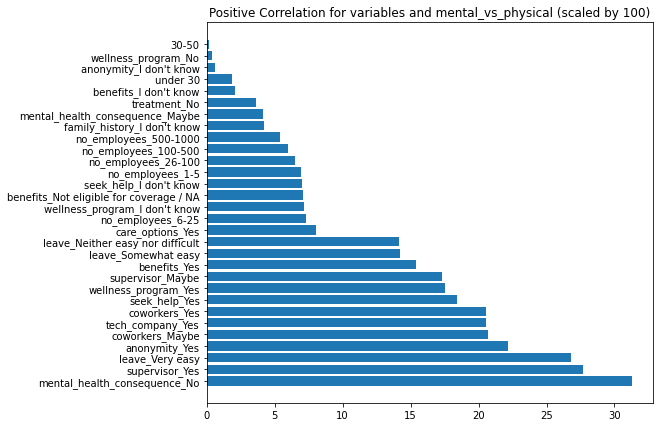

In [248]:
# positive correlation bar graph

plt.figure(figsize=(8,7))
plt.barh(positive_corr.index, 100*positive_corr['mental_vs_physical'])
plt.title('Positive Correlation for variables and mental_vs_physical (scaled by 100)');
plt.show()

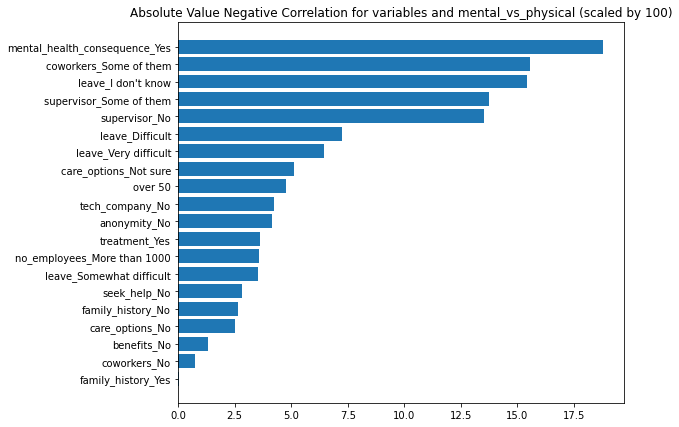

In [249]:
# negative correlation bar graph

plt.figure(figsize=(8,7))
plt.barh(negative_corr.index, abs(100*negative_corr['mental_vs_physical']))
plt.title('Absolute Value Negative Correlation for variables and mental_vs_physical (scaled by 100)');
plt.show()